   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived         0
pclass     

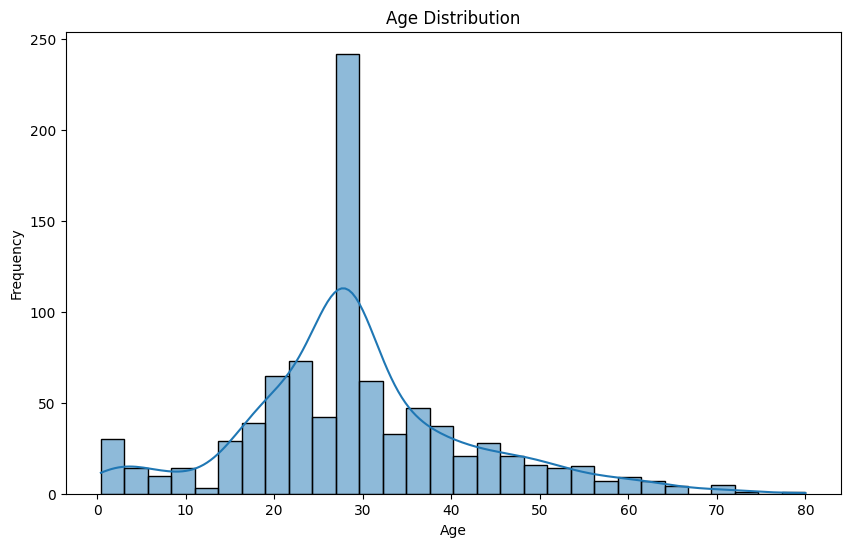

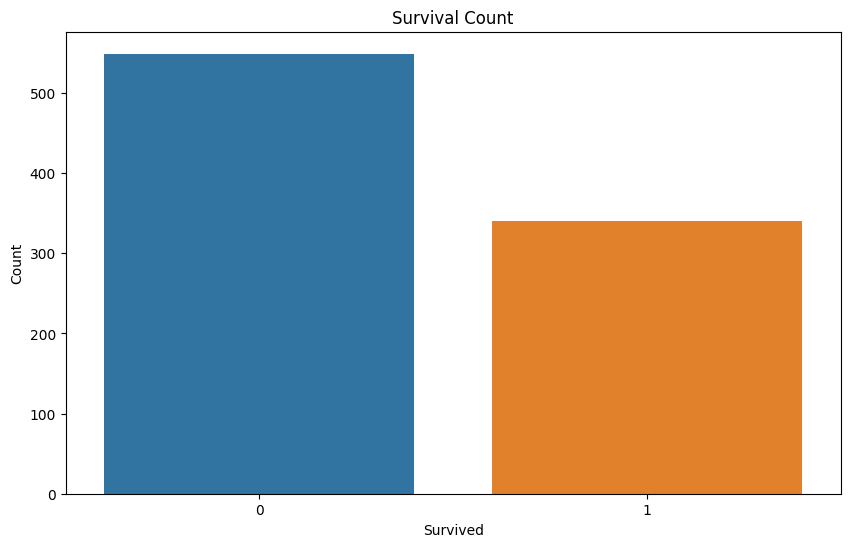

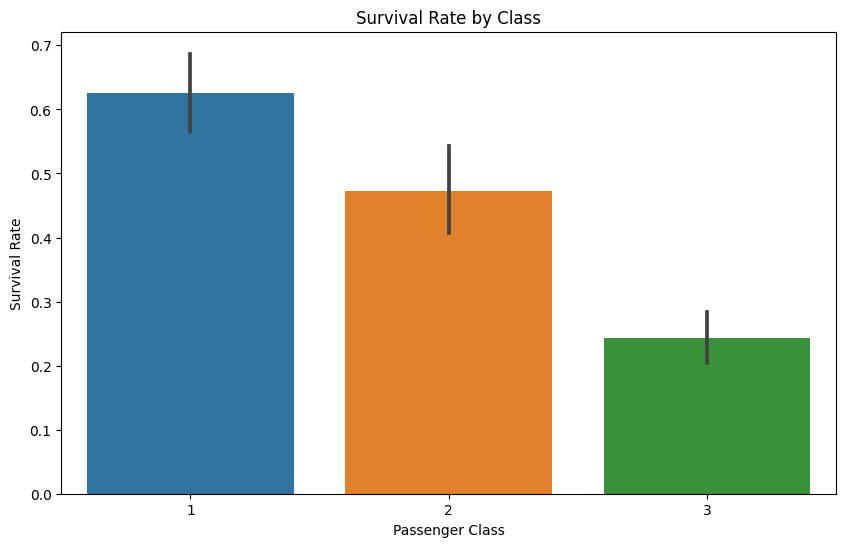

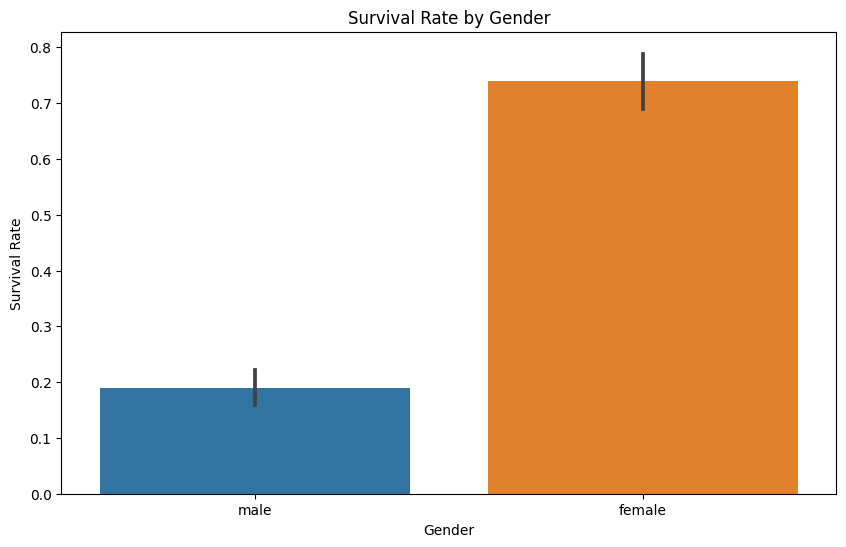

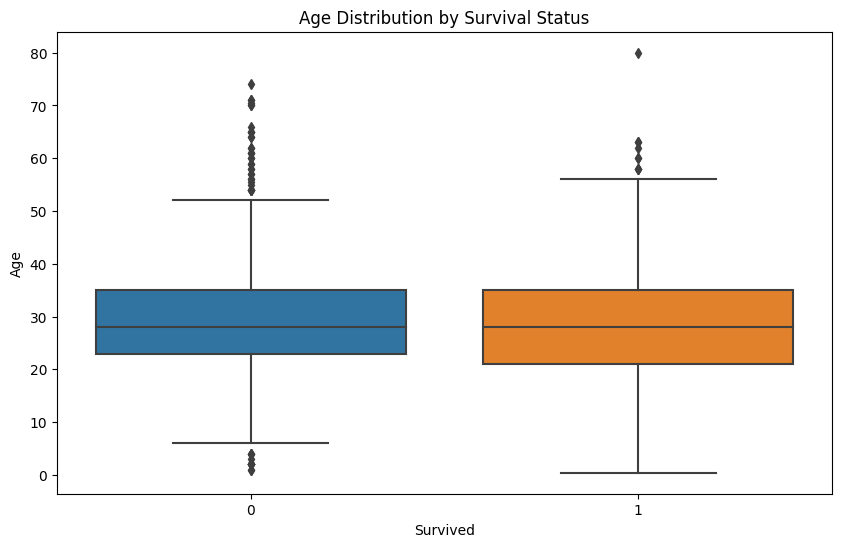

<Figure size 1200x1000 with 0 Axes>

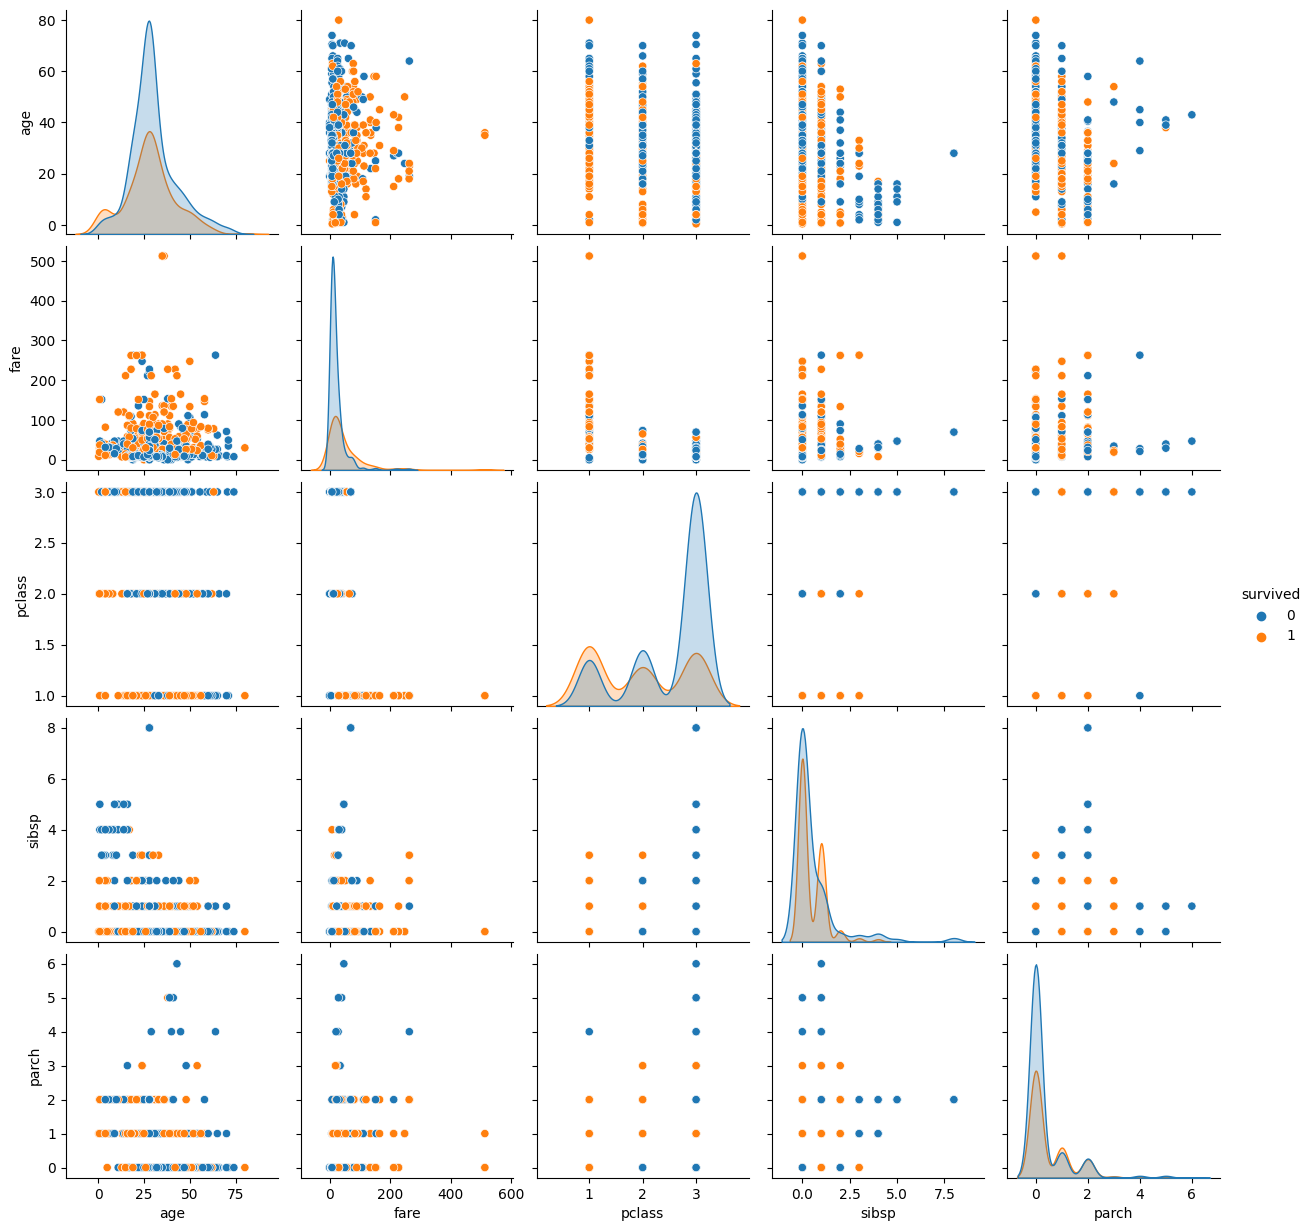

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset directly from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic.head())

# Display the column names to ensure they match expected names
print(titanic.columns)

# Data Cleaning
# Check for missing values
print(titanic.isnull().sum())

# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing embarked values with the most common port
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop the cabin column since it has too many missing values
if 'cabin' in titanic.columns:
    titanic.drop('cabin', axis=1, inplace=True)

# Drop rows where the 'embark_town' is missing
titanic.dropna(subset=['embark_town'], inplace=True)

# Confirm that there are no more missing values
print(titanic.isnull().sum())

# Exploratory Data Analysis (EDA)
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survived vs Not Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival Rate by Class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Pairplot to see the relationships between variables
plt.figure(figsize=(12, 10))
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass', 'sibsp', 'parch'])
plt.show()
